# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')

In [3]:
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [4]:
# Your code here - Manipulate column names

list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10+',
 'ages_10-14',
 'ages_10-16',
 'ages_10-21',
 'ages_11-16',
 'ages_12+',
 'ages_12-16',
 'ages_14+',
 'ages_16+',
 'ages_1½-3',
 'ages_1½-5',
 'ages_2-5',
 'ages_4+',
 'ages_4-7',
 'ages_4-99',
 'ages_5+',
 'ages_5-12',
 'ages_5-8',
 'ages_6+',
 'ages_6-12',
 'ages_6-14',
 'ages_7+',
 'ages_7-12',
 'ages_7-14',
 'ages_8+',
 'ages_8-12',
 'ages_8-14',
 'ages_9+',
 'ages_9-12',
 'ages_9-14',
 'ages_9-16',
 'theme_name_Angry Birds™',
 'theme_name_Architecture',
 'theme_name_BOOST',
 "theme_name_Blue's Helicopter Pursuit",
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus Gyrosphere Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator 3-in-1',
 'theme_name_Creator Expert',
 'theme_name_DC Comics™ Super Heroes',
 'theme_name_DC Super Hero Girls',
 'theme_name_DIMENSIONS™',
 'theme_name_DUPLO®',
 'theme_name_Dilophosaurus Outpost Attack',
 'theme_name_Disn

In [5]:
subs = [(' ','_'), ('+','plus'), ('½','half'), ("'",""),
        ('-','_'), ('™',''), ('®',''), ('.','')]

def col_formatting(col):
    for old, new in subs:
        col = col.replace(old, new)
    return col

In [6]:
df.columns = [col_formatting(col) for col in df.columns]

In [7]:
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [8]:
# Your code here - Define the target and predictors

outcome = 'list_price'
x_cols = list(df.columns)

x_cols.remove(outcome)

In [9]:
outcome

'list_price'

In [10]:
x_cols

['piece_count',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Outpost_Attack',
 

In [11]:
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [12]:
# Your code here - Split into train and test

train, test = train_test_split(df)

In [13]:
train.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
10306,0.431977,133.3971,0.634817,-0.306741,-0.252954,0.278777,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
7131,-0.548522,45.1278,-0.370585,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3886,-0.267004,40.7520,0.606889,0.216064,0.368848,0.761617,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2978,-0.454683,12.1380,-0.342657,-4.140649,0.990651,0.439724,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2894,-0.461901,13.2522,-0.175090,-0.306741,0.368848,-0.204063,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
# Your code here - Fit the actual model

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     543.6
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:29:06   Log-Likelihood:                -40357.
No. Observations:                8152   AIC:                         8.090e+04
Df Residuals:                    8057   BIC:                         8.157e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.7012      1.704     36.791      0.000      59.360      66.042
piece_count                                         77.9539      0.895     87.129      0.000      76.200      79.708
num_reviews                                          5.1513      0.662      7.784      0.000       3.854       6.449
play_star_rating                                     5.3382      0.615      8.683      0.000       4.133       6.543
star_rating                                         -1.6205      0.700     -2.314      0.021      -2.993      -0.247
val_star_rating                                     -8.3244      0.623    -13.353      0.000      -9.546      -7.102
ages_10plus                                        114.8814      6.374     18.024      0.000     102.387     127.375
ages_10_14                                         -19.9249      9.949     -2.003      0.045     -39.427      -0.423
ages_10_16                                         -12.7352      3.838     -3.318      0.001     -20.259      -5.211
ages_10_21                                          62.0970      7.170      8.660      0.000      48.041      76.153
ages_11_16                                         -33.1440      5.763     -5.751      0.000     -44.442     -21.846
ages_12plus                                         67.1568      5.237     12.824      0.000      56.891      77.422
ages_12_16                                         -59.8253      6.288     -9.515      0.000     -72.151     -47.500
ages_14plus                                         25.8921      4.121      6.283      0.000      17.815      33.970
ages_16plus                                         27.4019      5.802      4.723      0.000      16.029      38.775
ages_1half_3                                        -8.9640      2.309     -3.883      0.000     -13.490      -4.438
ages_1half_5                                        -3.2880      2.890     -1.138      0.255      -8.952       2.376
ages_2_5                                            15.2459      1.627      9.373      0.000      12.057      18.434
ages_4plus                                         -13.9657      6.537     -2.136      0.033     -26.780      -1.152
ages_4_7                                            -6.4806      3.117     -2.079      0.038     -12.590      -0.371
ages_4_99                                           -4.9229      3.692     -1.333      0.182     -12.160       2.314
ages_5plus                                          -8.6782      3.153     -2.752      0.006     -14.859      -2.498
ages_5_12                                          -31.1418      3.064    -10.164      0.000     -37.148     -25.136
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [15]:
# Your code here - Remove features which do not appear to be statistically relevant

summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)

In [16]:
p_table.head()

,0,1,2,3,4,5,6
0,,coef,std err,t,P>|t|,[0.025,0.975]
1,Intercept,62.7012,1.704,36.791,0.000,59.360,66.042
2,piece_count,77.9539,0.895,87.129,0.000,76.200,79.708
3,num_reviews,5.1513,0.662,7.784,0.000,3.854,6.449
4,play_star_rating,5.3382,0.615,8.683,0.000,4.133,6.543


In [17]:
p_table.columns = p_table.iloc[0]

In [18]:
p_table.columns

Index(['', 'coef', 'std err', 't', 'P>|t|', '[0.025', '0.975]'], dtype='object', name=0)

In [19]:
p_table = p_table.drop(0)

In [20]:
p_table.head()

,,coef,std err,t,P>|t|,[0.025,0.975]
1,Intercept,62.7012,1.704,36.791,0.000,59.360,66.042
2,piece_count,77.9539,0.895,87.129,0.000,76.200,79.708
3,num_reviews,5.1513,0.662,7.784,0.000,3.854,6.449
4,play_star_rating,5.3382,0.615,8.683,0.000,4.133,6.543
5,star_rating,-1.6205,0.700,-2.314,0.021,-2.993,-0.247


In [21]:
p_table = p_table.set_index(p_table.columns[0])

In [22]:
p_table.head()

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,62.7012,1.704,36.791,0.000,59.360,66.042
piece_count,77.9539,0.895,87.129,0.000,76.200,79.708
num_reviews,5.1513,0.662,7.784,0.000,3.854,6.449
play_star_rating,5.3382,0.615,8.683,0.000,4.133,6.543
star_rating,-1.6205,0.700,-2.314,0.021,-2.993,-0.247


In [23]:
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)

In [24]:
x_cols.remove('Intercept')

In [25]:
# Your code here - Refit the model

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     709.6
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:29:09   Log-Likelihood:                -40367.
No. Observations:                8152   AIC:                         8.088e+04
Df Residuals:                    8079   BIC:                         8.139e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           66.9905      2.345     28.569      0.000      62.394      71.587
piece_count                                         77.9573      0.879     88.709      0.000      76.235      79.680
num_reviews                                          5.2185      0.656      7.957      0.000       3.933       6.504
play_star_rating                                     5.3904      0.602      8.954      0.000       4.210       6.571
star_rating                                         -1.5650      0.686     -2.280      0.023      -2.910      -0.220
val_star_rating                                     -8.3356      0.598    -13.942      0.000      -9.508      -7.164
ages_10plus                                        117.3329      7.330     16.006      0.000     102.963     131.702
ages_10_14                                         -18.7512     10.451     -1.794      0.073     -39.238       1.735
ages_10_16                                         -11.1836      4.074     -2.745      0.006     -19.170      -3.198
ages_10_21                                          64.8472      7.908      8.200      0.000      49.346      80.349
ages_11_16                                         -32.0600      5.890     -5.443      0.000     -43.606     -20.514
ages_12plus                                         69.0720      6.312     10.944      0.000      56.700      81.444
ages_12_16                                         -56.7029      6.774     -8.371      0.000     -69.981     -43.425
ages_14plus                                         27.5846      4.990      5.528      0.000      17.802      37.367
ages_16plus                                         28.5378      6.697      4.261      0.000      15.409      41.666
ages_1half_3                                        -5.1665      3.464     -1.492      0.136     -11.956       1.623
ages_2_5                                            18.7716      2.586      7.260      0.000      13.703      23.840
ages_4plus                                          -9.6673     10.011     -0.966      0.334     -29.291       9.956
ages_4_7                                            -4.1392      2.715     -1.525      0.127      -9.461       1.182
ages_5plus                                          -8.6703      3.238     -2.678      0.007     -15.017      -2.324
ages_5_12                                          -29.6127      3.102     -9.548      0.000     -35.693     -23.533
ages_6plus                                         -22.8376      5.673     -4.026      0.000     -33.959     -11.717
ages_6_12                                          -18.7996      2.472     -7.605      0.000     -23.645     -13.954
ages_7_12                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [26]:
# Your code here - Continue to refine the model

summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')

In [27]:
# Your code here - Refit the model

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     864.5
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:29:10   Log-Likelihood:                -40378.
No. Observations:                8152   AIC:                         8.088e+04
Df Residuals:                    8092   BIC:                         8.130e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.3068      1.319     49.518      0.000      62.722      67.892
piece_count                                         78.0231      0.878     88.872      0.000      76.302      79.744
num_reviews                                          4.9243      0.611      8.060      0.000       3.727       6.122
play_star_rating                                     5.5263      0.598      9.248      0.000       4.355       6.698
star_rating                                         -1.5155      0.680     -2.230      0.026      -2.848      -0.183
val_star_rating                                     -8.4340      0.593    -14.233      0.000      -9.596      -7.272
ages_10plus                                        121.3036      7.148     16.971      0.000     107.292     135.315
ages_10_16                                          -7.2773      3.646     -1.996      0.046     -14.424      -0.131
ages_10_21                                          67.4382      7.795      8.652      0.000      52.159      82.718
ages_11_16                                         -28.1785      5.614     -5.020      0.000     -39.183     -17.174
ages_12plus                                         72.9006      6.138     11.877      0.000      60.868      84.933
ages_12_16                                         -52.4044      6.531     -8.024      0.000     -65.207     -39.602
ages_14plus                                         34.1909      4.404      7.764      0.000      25.559      42.823
ages_16plus                                         33.7765      6.464      5.226      0.000      21.106      46.447
ages_2_5                                            21.8939      1.841     11.895      0.000      18.286      25.502
ages_5plus                                          -7.2552      3.101     -2.339      0.019     -13.335      -1.176
ages_5_12                                          -25.6451      2.542    -10.087      0.000     -30.629     -20.662
ages_6plus                                         -18.7237      5.384     -3.477      0.001     -29.278      -8.169
ages_6_12                                          -14.5153      1.701     -8.532      0.000     -17.850     -11.181
ages_7_12                                          -14.4771      2.066     -7.007      0.000     -18.527     -10.427
ages_7_14                                           -9.7813      1.776     -5.507      0.000     -13.263      -6.300
ages_8plus                                          20.8350      4.907      4.246      0.000      11.215      30.455
ages_8_12                                          -15.6164      2.699     -5.785      0.000     -20.908     -10.325
ages_8_14                                

In [28]:
# Refine again

summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')

In [29]:
# Refit again

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     910.0
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:29:11   Log-Likelihood:                -40383.
No. Observations:                8152   AIC:                         8.088e+04
Df Residuals:                    8095   BIC:                         8.128e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.7082      1.200     53.913      0.000      62.355      67.061
piece_count                                         77.6815      0.846     91.790      0.000      76.023      79.340
num_reviews                                          4.9292      0.611      8.066      0.000       3.731       6.127
play_star_rating                                     5.5561      0.596      9.329      0.000       4.389       6.724
star_rating                                         -1.5024      0.677     -2.218      0.027      -2.830      -0.174
val_star_rating                                     -8.4441      0.592    -14.274      0.000      -9.604      -7.284
ages_10plus                                        123.3487      7.090     17.397      0.000     109.450     137.248
ages_10_16                                          -5.5299      3.464     -1.596      0.110     -12.321       1.261
ages_10_21                                          68.8611      7.777      8.855      0.000      53.616      84.106
ages_11_16                                         -26.2595      5.440     -4.827      0.000     -36.923     -15.596
ages_12plus                                         76.1121      5.929     12.838      0.000      64.490      87.734
ages_12_16                                         -50.1129      6.346     -7.897      0.000     -62.552     -37.674
ages_14plus                                         37.7548      4.046      9.331      0.000      29.823      45.686
ages_16plus                                         38.6138      6.027      6.407      0.000      26.800      50.428
ages_2_5                                            22.6303      1.786     12.668      0.000      19.128      26.132
ages_5plus                                          -6.9012      3.096     -2.229      0.026     -12.970      -0.832
ages_5_12                                          -23.4937      2.394     -9.812      0.000     -28.187     -18.800
ages_6plus                                         -14.7609      5.096     -2.897      0.004     -24.750      -4.772
ages_6_12                                          -12.6716      1.511     -8.385      0.000     -15.634      -9.709
ages_7_12                                          -13.1123      1.929     -6.798      0.000     -16.893      -9.331
ages_7_14                                           -8.5752      1.652     -5.190      0.000     -11.814      -5.336
ages_8plus                                          21.9424      4.883      4.493      0.000      12.370      31.515
ages_8_12                                          -14.0780      2.553     -5.515      0.000     -19.082      -9.074
ages_8_14                                

In [30]:
# Refine again

summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')

In [31]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     926.3
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:29:11   Log-Likelihood:                -40384.
No. Observations:                8152   AIC:                         8.088e+04
Df Residuals:                    8096   BIC:                         8.127e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.2127      1.160     55.379      0.000      61.940      66.486
piece_count                                         77.4532      0.834     92.847      0.000      75.818      79.088
num_reviews                                          4.8657      0.610      7.978      0.000       3.670       6.061
play_star_rating                                     5.6529      0.593      9.540      0.000       4.491       6.814
star_rating                                         -1.5367      0.677     -2.269      0.023      -2.864      -0.209
val_star_rating                                     -8.5149      0.590    -14.433      0.000      -9.671      -7.358
ages_10plus                                        123.8692      7.083     17.487      0.000     109.984     137.755
ages_10_21                                          69.1848      7.775      8.898      0.000      53.944      84.426
ages_11_16                                         -25.0252      5.385     -4.647      0.000     -35.582     -14.469
ages_12plus                                         77.2887      5.883     13.137      0.000      65.756      88.821
ages_12_16                                         -48.6770      6.282     -7.749      0.000     -60.992     -36.362
ages_14plus                                         39.1403      3.952      9.903      0.000      31.393      46.888
ages_16plus                                         40.5930      5.898      6.882      0.000      29.031      52.155
ages_2_5                                            23.0136      1.770     12.999      0.000      19.543      26.484
ages_5plus                                          -6.7267      3.094     -2.174      0.030     -12.792      -0.661
ages_5_12                                          -23.2072      2.388     -9.719      0.000     -27.888     -18.526
ages_6plus                                         -14.2861      5.088     -2.808      0.005     -24.259      -4.313
ages_6_12                                          -12.2194      1.485     -8.231      0.000     -15.130      -9.309
ages_7_12                                          -12.6451      1.907     -6.632      0.000     -16.382      -8.908
ages_7_14                                           -8.1803      1.634     -5.007      0.000     -11.383      -4.978
ages_8plus                                          22.2265      4.881      4.554      0.000      12.659      31.794
ages_8_12                                          -13.4412      2.522     -5.330      0.000     -18.384      -8.498
ages_8_14                                           -6.8324      1.604     -4.260      0.000      -9.977      -3.688
ages_9plus                               

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [32]:
# Your code here - Code a way to identify multicollinearity

X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/Users/timsennett/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.390101527433588),
 ('num_reviews', 2.5169304121490184),
 ('play_star_rating', 2.3990070517803064),
 ('star_rating', 3.14049548266343),
 ('val_star_rating', 2.386433214036685),
 ('ages_10plus', 17.531394350159616),
 ('ages_10_21', 7.142562100462962),
 ('ages_11_16', 1.1214906767906896),
 ('ages_12plus', 6.898710175368688),
 ('ages_12_16', 1.1359265384469093),
 ('ages_14plus', 1.6943126299039417),
 ('ages_16plus', 8.586824773506077),
 ('ages_2_5', 1.1764913907075367),
 ('ages_5plus', inf),
 ('ages_5_12', 2.7773110538125243),
 ('ages_6plus', 2.3605749384271215),
 ('ages_6_12', 1.5131597206951206),
 ('ages_7_12', 1.3924284360073067),
 ('ages_7_14', 1.6179777605233072),
 ('ages_8plus', 3.3174773129266337),
 ('ages_8_12', 1.2083813443125586),
 ('ages_8_14', 1.487592867068658),
 ('ages_9plus', 1.5447715932727462),
 ('ages_9_12', 1.0160328438735),
 ('theme_name_Architecture', 5.847451918478114),
 ('theme_name_BOOST', 1.0633961135157013),
 ('theme_name_Blues_Helicopter_Pursui

In [33]:
# Typically, variables with a vif of 5 or greater
# (or more definitively 10 or greater) are displaying
# multicollinearity with other variables in the feature set.

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [34]:
# Your code here - Subset features based on multicollinearity

vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

56 47


In [35]:
# Your code here - Refit model with subset features

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     966.3
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:29:15   Log-Likelihood:                -40789.
No. Observations:                8152   AIC:                         8.167e+04
Df Residuals:                    8104   BIC:                         8.201e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           70.0559      1.013     69.179      0.000      68.071      72.041
piece_count                                         79.5148      0.678    117.232      0.000      78.185      80.844
num_reviews                                          3.3597      0.595      5.650      0.000       2.194       4.525
play_star_rating                                     7.3067      0.539     13.545      0.000       6.249       8.364
star_rating                                         -2.6920      0.686     -3.922      0.000      -4.037      -1.347
val_star_rating                                     -9.3730      0.613    -15.291      0.000     -10.575      -8.171
ages_11_16                                         -35.8220      5.452     -6.571      0.000     -46.509     -25.135
ages_12_16                                         -60.3693      6.308     -9.570      0.000     -72.735     -48.004
ages_14plus                                         20.0389      3.594      5.575      0.000      12.993      27.085
ages_2_5                                            18.1318      1.748     10.371      0.000      14.705      21.559
ages_5_12                                          -28.3810      2.435    -11.653      0.000     -33.155     -23.607
ages_6plus                                         -18.5246      5.300     -3.495      0.000     -28.913      -8.136
ages_6_12                                          -18.1394      1.462    -12.410      0.000     -21.005     -15.274
ages_7_12                                          -18.1256      1.941     -9.340      0.000     -21.930     -14.321
ages_7_14                                          -13.8841      1.633     -8.503      0.000     -17.085     -10.683
ages_8plus                                           0.5327      4.422      0.120      0.904      -8.135       9.201
ages_8_12                                          -18.8230      2.570     -7.324      0.000     -23.861     -13.785
ages_8_14                                          -12.3654      1.622     -7.622      0.000     -15.546      -9.185
ages_9plus                                          16.1203     10.597      1.521      0.128      -4.652      36.892
ages_9_12                                          -30.4323      6.294     -4.835      0.000     -42.770     -18.095
theme_name_BOOST                                    84.2403      9.940      8.475      0.000      64.756     103.725
theme_name_Blues_Helicopter_Pursuit                 21.0167      8.953      2.347      0.019       3.467      38.567
theme_name_Carnotaurus_Gyrosphere_Escape            45.3248      8.985      5.045      0.000      27.712      62.937
theme_name_City                          

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

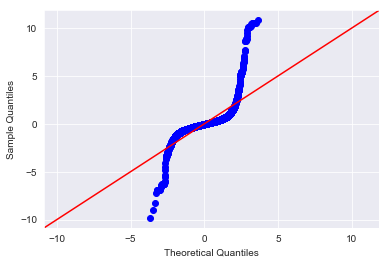

In [36]:
# Your code here - Check that the residuals are normally distributed

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [37]:
# Not normal!

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

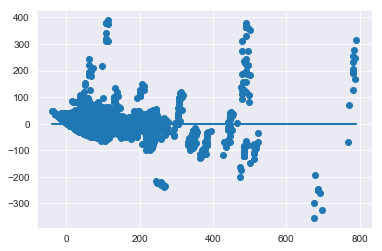

In [38]:
# Your code here - Check that the residuals are homoscedastic

plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [39]:
# Your code here - Check for outliers

for i in range(80, 100):
    q = i / 100
    print('{} percentile: {}'.format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [40]:
# Your code here
# Remove extreme outliers

df = df[df.list_price < 450] # Subsetting to remove extreme outliers
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Rerun the model

In [41]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     477.7
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:29:27   Log-Likelihood:                -5237.8
No. Observations:                8067   AIC:                         1.057e+04
Df Residuals:                    8019   BIC:                         1.091e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.5173      0.013    264.320      0.000       3.491       3.543
piece_count                                          0.6563      0.010     63.825      0.000       0.636       0.676
num_reviews                                         -0.0294      0.008     -3.668      0.000      -0.045      -0.014
play_star_rating                                     0.1354      0.007     19.264      0.000       0.122       0.149
star_rating                                         -0.0588      0.009     -6.687      0.000      -0.076      -0.042
val_star_rating                                     -0.1332      0.008    -17.061      0.000      -0.148      -0.118
ages_11_16                                           0.0135      0.067      0.201      0.841      -0.119       0.146
ages_12_16                                          -0.2500      0.083     -3.021      0.003      -0.412      -0.088
ages_14plus                                          0.3626      0.050      7.187      0.000       0.264       0.462
ages_2_5                                             0.3884      0.023     17.123      0.000       0.344       0.433
ages_5_12                                           -0.6682      0.031    -21.723      0.000      -0.729      -0.608
ages_6plus                                          -0.6917      0.067    -10.354      0.000      -0.823      -0.561
ages_6_12                                           -0.2052      0.019    -10.974      0.000      -0.242      -0.169
ages_7_12                                           -0.0273      0.025     -1.080      0.280      -0.077       0.022
ages_7_14                                           -0.0821      0.021     -3.958      0.000      -0.123      -0.041
ages_8plus                                           0.5452      0.058      9.413      0.000       0.432       0.659
ages_8_12                                            0.0915      0.032      2.819      0.005       0.028       0.155
ages_8_14                                            0.1766      0.021      8.519      0.000       0.136       0.217
ages_9plus                                           0.1676      0.142      1.183      0.237      -0.110       0.445
ages_9_12                                            0.2219      0.081      2.745      0.006       0.063       0.380
theme_name_BOOST                                     0.9163      0.120      7.622      0.000       0.681       1.152
theme_name_Blues_Helicopter_Pursuit                  0.6953      0.122      5.686      0.000       0.456       0.935
theme_name_Carnotaurus_Gyrosphere_Escape             1.1132      0.112      9.899      0.000       0.893       1.334
theme_name_City                          

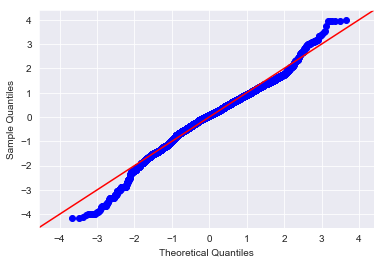

In [42]:
# Your code here - Check normality assumption

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

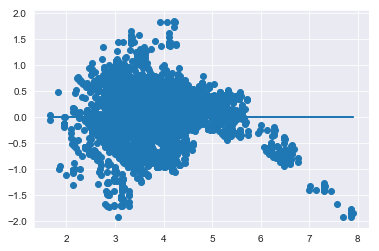

In [43]:
# Your code here - Check the Homoscedasticity Assumption

plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [44]:
# Your code goes here

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 